Fitted Parameters:
A (amplitude) = 0.116039 mW
μ (center) = 13903.68 μm
σ (width) = 148.41 μm
y0 (background) = 0.002189 mW


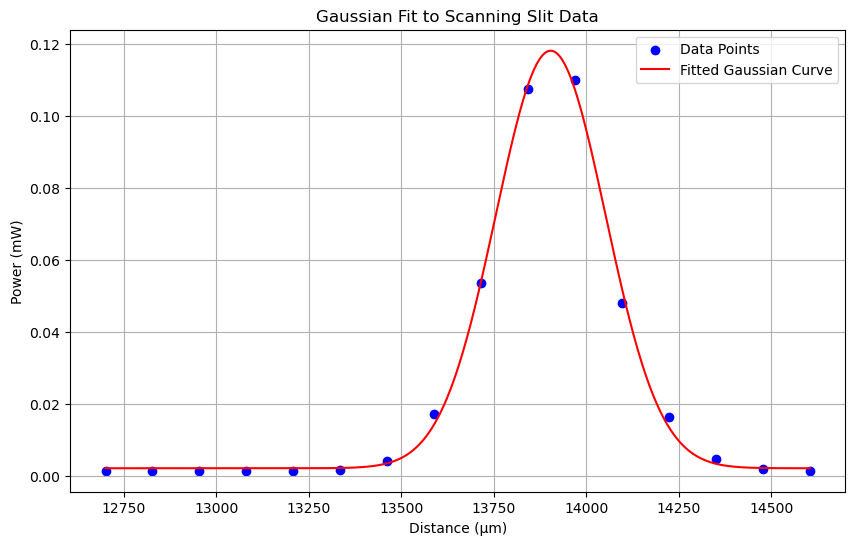

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the Gaussian function
def gaussian(x, A, mu, sigma, y0):
    return y0 + A * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Data from the table
x1um = np.array([12700, 12827, 12954, 13081, 13208, 13335, 13462, 13589, 13716, 13843, 13970, 14097, 14224, 14351, 14478, 14605])
p1 = np.array([0.001503, 0.001503, 0.001503, 0.001503, 0.001503, 0.00167, 0.004175, 0.017368, 0.053607, 0.107548, 0.110053, 0.048096, 0.016533, 0.004843, 0.002004, 0.001503])

# Initial guesses for the Gaussian parameters: [A, mu, sigma, y0]
initial_guess = [0.1, 13843, 500, 0.001]  # Adjust these based on your data

# Fit the Gaussian curve to the data
params, covariance = curve_fit(gaussian, x1um, p1, p0=initial_guess)

# Extract the fitted parameters
A_fit, mu_fit, sigma_fit, y0_fit = params

# Generate fitted curve using the fitted parameters
x_fit = np.linspace(min(x1um), max(x1um), 500)
y_fit = gaussian(x_fit, A_fit, mu_fit, sigma_fit, y0_fit)

# Plot the data points and the fitted Gaussian curve
plt.figure(figsize=(10, 6))
plt.scatter(x1um, p1, color='blue', label='Data Points')
plt.plot(x_fit, y_fit, color='red', label='Fitted Gaussian Curve')
plt.xlabel('Distance (μm)')
plt.ylabel('Power (mW)')
plt.title('Gaussian Fit to Scanning Slit Data')
plt.legend()
plt.grid(True)

# Display the fitted parameters
print(f"Fitted Parameters:")
print(f"A (amplitude) = {A_fit:.6f} mW")
print(f"μ (center) = {mu_fit:.2f} μm")
print(f"σ (width) = {sigma_fit:.2f} μm")
print(f"y0 (background) = {y0_fit:.6f} mW")

plt.show()

Fitted Parameters:
A (amplitude) = 0.255794 mW
μ (center) = 13383.28 μm
σ (width) = 143.29 μm
y0 (background) = 0.002827 mW


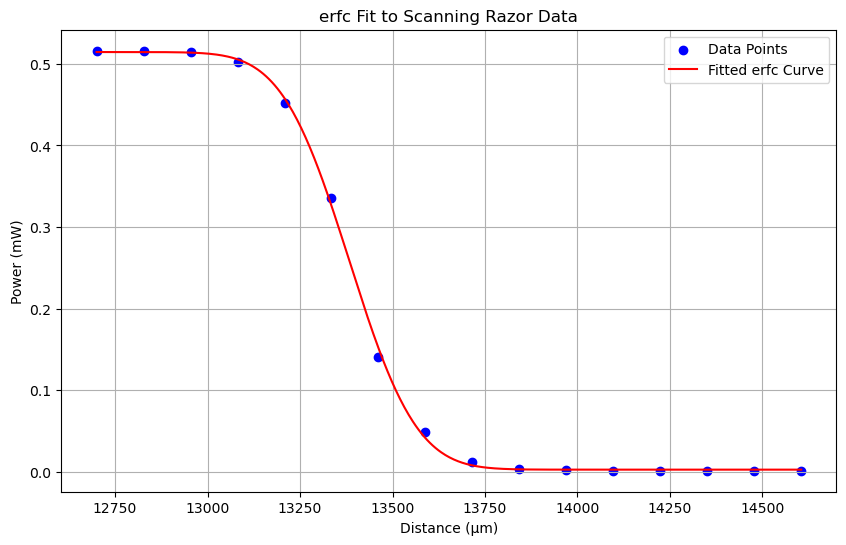

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import erfc

# Define the complementary error function (erfc) model
def erfc_model(x, A, mu, sigma, y0):
    return y0 + A * erfc((x - mu) / (np.sqrt(2) * sigma))

# Data from the table
z1um = np.array([12700, 12827, 12954, 13081, 13208, 13335, 13462, 13589, 13716, 13843, 13970, 14097, 14224, 14351, 14478, 14605])
p2 = np.array([0.51603, 0.51603, 0.51436, 0.50267, 0.45257, 0.33567, 0.141282, 0.048597, 0.012692, 0.003674, 0.002004, 0.00167, 0.00167, 0.001503, 0.001503, 0.001503])

# Initial guesses for the erfc parameters: [A, mu, sigma, y0]
initial_guess = [0.5, 13500, 500, 0.001]  # Adjust these based on your data

# Fit the erfc model to the data
params, covariance = curve_fit(erfc_model, z1um, p2, p0=initial_guess)

# Extract the fitted parameters
A_fit, mu_fit, sigma_fit, y0_fit = params

# Generate fitted curve using the fitted parameters
z_fit = np.linspace(min(z1um), max(z1um), 500)
p_fit = erfc_model(z_fit, A_fit, mu_fit, sigma_fit, y0_fit)

# Plot the data points and the fitted erfc curve
plt.figure(figsize=(10, 6))
plt.scatter(z1um, p2, color='blue', label='Data Points')
plt.plot(z_fit, p_fit, color='red', label='Fitted erfc Curve')
plt.xlabel('Distance (μm)')
plt.ylabel('Power (mW)')
plt.title('erfc Fit to Scanning Razor Data')
plt.legend()
plt.grid(True)

# Display the fitted parameters
print(f"Fitted Parameters:")
print(f"A (amplitude) = {A_fit:.6f} mW")
print(f"μ (center) = {mu_fit:.2f} μm")
print(f"σ (width) = {sigma_fit:.2f} μm")
print(f"y0 (background) = {y0_fit:.6f} mW")

plt.show()

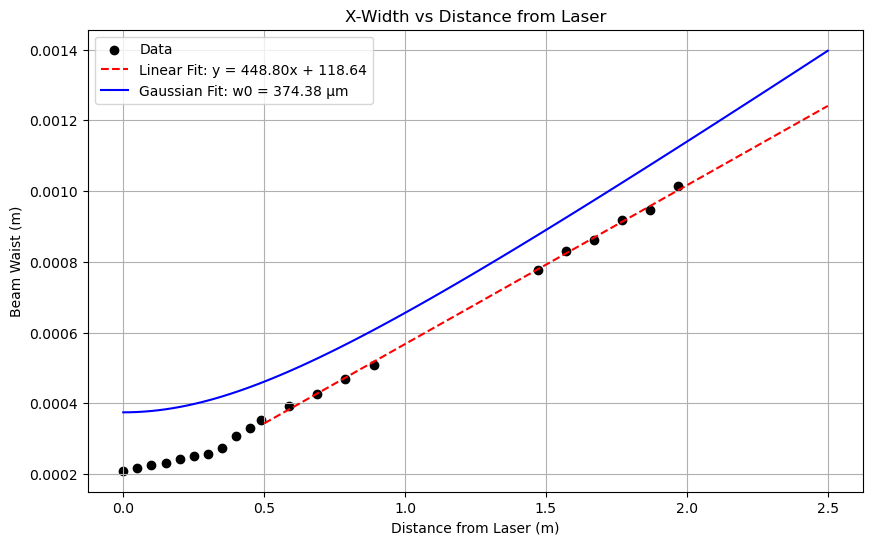

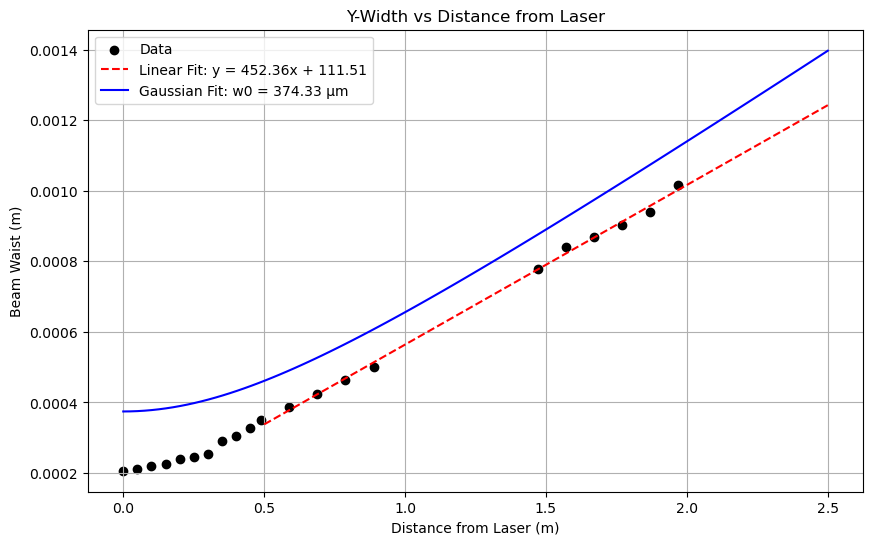

X-Width Linear Fit Parameters: slope = 448.80, intercept = 0.00
X-Width Gaussian Fit Parameter: w0 = 374.38 µm
Y-Width Linear Fit Parameters: slope = 452.36, intercept = 0.00
Y-Width Gaussian Fit Parameter: w0 = 374.33 µm


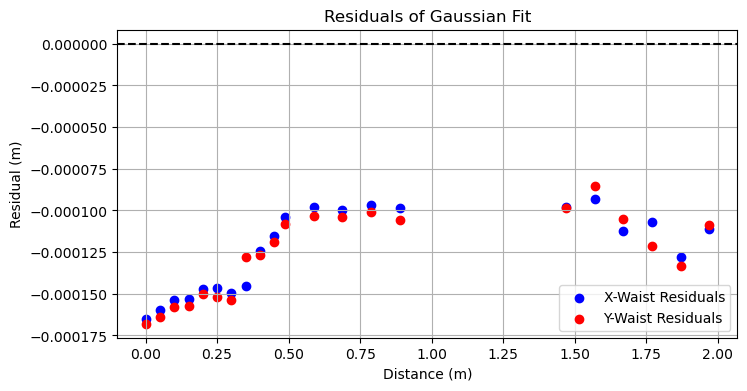

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Provided data
save_dist = np.array([226, 276, 326, 376, 426, 476, 526, 576, 626, 676, 714, 814, 914, 1014, 1114, 1696, 1796, 1896, 1996, 2096, 2196])  # Distance in mm
save_xwaist = np.array([209.344, 215.768, 224.665, 230.092, 242.302, 251.072, 257.977, 273.659, 307.357, 330.511, 353.572, 392.216, 427.087, 469.162, 508.568, 777.166, 831.053, 861.418, 916.692, 945.945, 1013.54])  # X-width in µm
save_ywaist = np.array([206.363, 211.087, 220.194, 225.481, 239.543, 246.092, 253.839, 291.044, 304.863, 326.941, 349.081, 386.63, 422.738, 464.798, 501.221, 776.91, 839.214, 868.847, 902.159, 940.733, 1015.62])  # Y-width in µm

# Convert distances to meters for consistency with the formula
save_dist_m = save_dist / 1000  # Convert mm to meters
save_dist_m -= save_dist_m[0]  # Normalize to start at zero
save_xwaist_m = save_xwaist * 1e-6  # Convert micrometers to meters
save_ywaist_m = save_ywaist * 1e-6  # Convert micrometers to meters

# Linear fit function
def linear_fit(x, a, b):
    return a * x + b

# Gaussian beam divergence formula (correct form fit)
def gaussian_beam_fit(z, w0, lambda_=633e-9):
    zR = (np.pi * w0**2) / lambda_  # Rayleigh range
    return w0 * np.sqrt(1 + (z / zR)**2)

# Function to perform fits and plot results
def plot_fits(distances, x_waist, y_waist, title_suffix):
    # Perform linear fit (only for distances > 0.5 meters)
    mask = distances > 0.5  
    popt_linear_x, _ = curve_fit(linear_fit, distances[mask], x_waist[mask])
    popt_linear_y, _ = curve_fit(linear_fit, distances[mask], y_waist[mask])

    # Perform Gaussian beam fit with bounds and different optimization method
    popt_gaussian_x, _ = curve_fit(
        gaussian_beam_fit, distances, x_waist, 
        p0=[min(x_waist)], bounds=(1e-7, 500e-6), method='trf'
    )
    popt_gaussian_y, _ = curve_fit(
        gaussian_beam_fit, distances, y_waist, 
        p0=[min(y_waist)], bounds=(1e-7, 500e-6), method='trf'
    )

    # Generate fitted values for plotting
    x_fit_linear = np.linspace(0.5, 2.5, 100)  
    y_fit_linear_x = linear_fit(x_fit_linear, *popt_linear_x)
    y_fit_linear_y = linear_fit(x_fit_linear, *popt_linear_y)

    x_fit_gaussian = np.linspace(0, 2.5, 100)  
    y_fit_gaussian_x = gaussian_beam_fit(x_fit_gaussian, *popt_gaussian_x)
    y_fit_gaussian_y = gaussian_beam_fit(x_fit_gaussian, *popt_gaussian_y)

    # Plot for x-width
    plt.figure(figsize=(10, 6))
    plt.scatter(distances, x_waist, label='Data', color='black')
    plt.plot(x_fit_linear, y_fit_linear_x, label=f'Linear Fit: y = {popt_linear_x[0]*1e6:.2f}x + {popt_linear_x[1]*1e6:.2f}', linestyle='--', color='red')
    plt.plot(x_fit_gaussian, y_fit_gaussian_x, label=f'Gaussian Fit: w0 = {popt_gaussian_x[0]*1e6:.2f} µm', linestyle='-', color='blue')
    plt.xlabel('Distance from Laser (m)')
    plt.ylabel('Beam Waist (m)')
    plt.title(f'X-Width {title_suffix}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot for y-width
    plt.figure(figsize=(10, 6))
    plt.scatter(distances, y_waist, label='Data', color='black')
    plt.plot(x_fit_linear, y_fit_linear_y, label=f'Linear Fit: y = {popt_linear_y[0]*1e6:.2f}x + {popt_linear_y[1]*1e6:.2f}', linestyle='--', color='red')
    plt.plot(x_fit_gaussian, y_fit_gaussian_y, label=f'Gaussian Fit: w0 = {popt_gaussian_y[0]*1e6:.2f} µm', linestyle='-', color='blue')
    plt.xlabel('Distance from Laser (m)')
    plt.ylabel('Beam Waist (m)')
    plt.title(f'Y-Width {title_suffix}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print the fit parameters
    print(f"X-Width Linear Fit Parameters: slope = {popt_linear_x[0]*1e6:.2f}, intercept = {popt_linear_x[1]:.2f}")
    print(f"X-Width Gaussian Fit Parameter: w0 = {popt_gaussian_x[0]*1e6:.2f} µm")
    print(f"Y-Width Linear Fit Parameters: slope = {popt_linear_y[0]*1e6:.2f}, intercept = {popt_linear_y[1]:.2f}")
    print(f"Y-Width Gaussian Fit Parameter: w0 = {popt_gaussian_y[0]*1e6:.2f} µm")

    # Residual Analysis
    fitted_x = gaussian_beam_fit(distances, *popt_gaussian_x)
    fitted_y = gaussian_beam_fit(distances, *popt_gaussian_y)

    plt.figure(figsize=(8, 4))
    plt.scatter(distances, x_waist - fitted_x, label="X-Waist Residuals", color="blue")
    plt.scatter(distances, y_waist - fitted_y, label="Y-Waist Residuals", color="red")
    plt.axhline(0, color="black", linestyle="--")
    plt.xlabel("Distance (m)")
    plt.ylabel("Residual (m)")
    plt.legend()
    plt.title("Residuals of Gaussian Fit")
    plt.grid(True)
    plt.show()

# Plot fits for x-width and y-width
plot_fits(save_dist_m, save_xwaist_m, save_ywaist_m, "vs Distance from Laser")

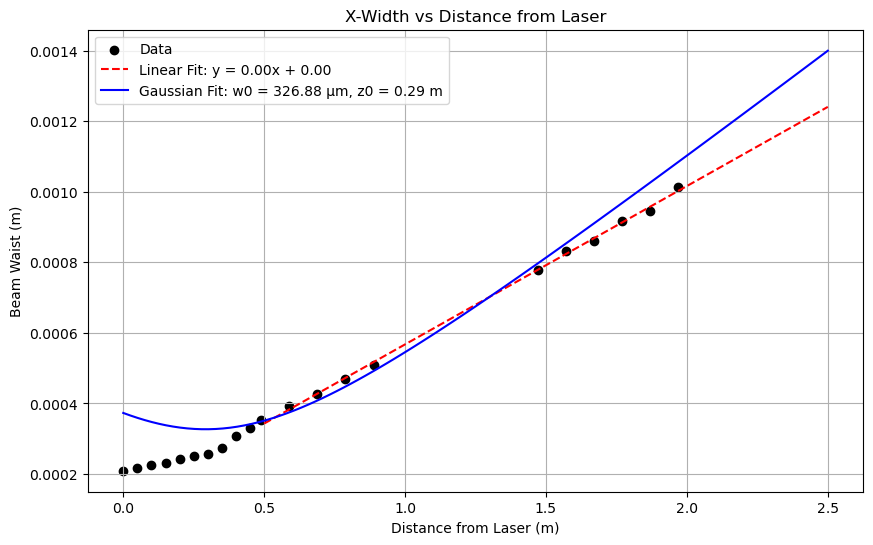

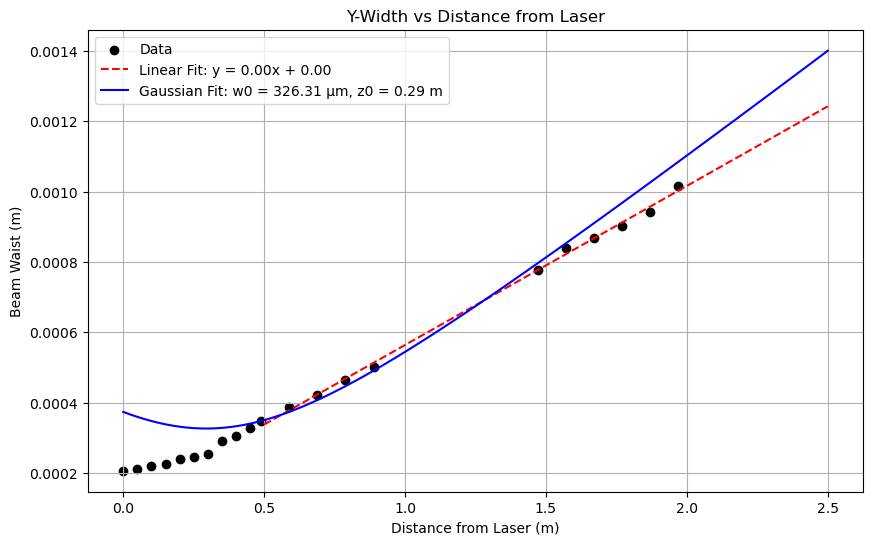

X-Width Linear Fit Parameters: slope = 0.00, intercept = 0.00
X-Width Gaussian Fit Parameters: w0 = 326.88 µm, z0 = 0.29 m
Y-Width Linear Fit Parameters: slope = 0.00, intercept = 0.00
Y-Width Gaussian Fit Parameters: w0 = 326.31 µm, z0 = 0.29 m


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Provided data (in mm for distance and µm for beam waists)
save_dist = np.array([226, 276, 326, 376, 426, 476, 526, 576, 626, 676, 714, 814, 914, 1014, 1114, 1696, 1796, 1896, 1996, 2096, 2196])
save_xwaist = np.array([209.344, 215.768, 224.665, 230.092, 242.302, 251.072, 257.977, 273.659, 307.357, 330.511, 353.572, 392.216, 427.087, 469.162, 508.568, 777.166, 831.053, 861.418, 916.692, 945.945, 1013.54])
save_ywaist = np.array([206.363, 211.087, 220.194, 225.481, 239.543, 246.092, 253.839, 291.044, 304.863, 326.941, 349.081, 386.63, 422.738, 464.798, 501.221, 776.91, 839.214, 868.847, 902.159, 940.733, 1015.62])

# Convert distances from mm to m and normalize (so the first measurement is at z = 0)
save_dist_m = save_dist / 1000  # mm -> m
save_dist_m -= save_dist_m[0]

# Convert beam waists from µm to m
save_xwaist_m = save_xwaist * 1e-6
save_ywaist_m = save_ywaist * 1e-6

# Linear fit function for a simple comparison
def linear_fit(x, a, b):
    return a * x + b

# Gaussian beam fit function with an extra parameter z0 (waist position offset)
def gaussian_beam_fit(z, w0, z0, lambda_=633e-9):
    """
    w0 : beam waist (radius) at the waist position
    z0 : the position of the beam waist (offset)
    lambda_: laser wavelength (default 633 nm)
    """
    zR = (np.pi * w0**2) / lambda_  # Rayleigh range
    return w0 * np.sqrt(1 + ((z - z0) / zR)**2)

def plot_fits(distances, x_waist, y_waist, title_suffix):
    # --- Linear fits (only for distances > 0.5 m) ---
    mask = distances > 0.5  
    popt_linear_x, _ = curve_fit(linear_fit, distances[mask], x_waist[mask])
    popt_linear_y, _ = curve_fit(linear_fit, distances[mask], y_waist[mask])
    
    # --- Gaussian beam fits with extra parameter for waist position (z0) ---
    # Use an initial guess of [minimum waist, 0.0] (i.e. assume waist is near the start)
    p0_x = [min(x_waist), 0.0]
    bounds_x = ([1e-7, -np.inf], [500e-6, np.inf])
    popt_gaussian_x, _ = curve_fit(
        gaussian_beam_fit, distances, x_waist, 
        p0=p0_x, bounds=bounds_x, method='trf'
    )
    
    p0_y = [min(y_waist), 0.0]
    bounds_y = ([1e-7, -np.inf], [500e-6, np.inf])
    popt_gaussian_y, _ = curve_fit(
        gaussian_beam_fit, distances, y_waist, 
        p0=p0_y, bounds=bounds_y, method='trf'
    )
    
    # --- Generate fitted curves for plotting ---
    x_fit_linear = np.linspace(0.5, 2.5, 100)
    y_fit_linear_x = linear_fit(x_fit_linear, *popt_linear_x)
    y_fit_linear_y = linear_fit(x_fit_linear, *popt_linear_y)
    
    x_fit_gaussian = np.linspace(0, 2.5, 100)
    y_fit_gaussian_x = gaussian_beam_fit(x_fit_gaussian, *popt_gaussian_x)
    y_fit_gaussian_y = gaussian_beam_fit(x_fit_gaussian, *popt_gaussian_y)
    
    # --- Plot for X-width ---
    plt.figure(figsize=(10, 6))
    plt.scatter(distances, x_waist, label='Data', color='black')
    plt.plot(x_fit_linear, y_fit_linear_x, 
             label=f'Linear Fit: y = {popt_linear_x[0]:.2f}x + {popt_linear_x[1]:.2f}', 
             linestyle='--', color='red')
    plt.plot(x_fit_gaussian, y_fit_gaussian_x, 
             label=f'Gaussian Fit: w0 = {popt_gaussian_x[0]*1e6:.2f} µm, z0 = {popt_gaussian_x[1]:.2f} m', 
             linestyle='-', color='blue')
    plt.xlabel('Distance from Laser (m)')
    plt.ylabel('Beam Waist (m)')
    plt.title(f'X-Width {title_suffix}')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # --- Plot for Y-width ---
    plt.figure(figsize=(10, 6))
    plt.scatter(distances, y_waist, label='Data', color='black')
    plt.plot(x_fit_linear, y_fit_linear_y, 
             label=f'Linear Fit: y = {popt_linear_y[0]:.2f}x + {popt_linear_y[1]:.2f}', 
             linestyle='--', color='red')
    plt.plot(x_fit_gaussian, y_fit_gaussian_y, 
             label=f'Gaussian Fit: w0 = {popt_gaussian_y[0]*1e6:.2f} µm, z0 = {popt_gaussian_y[1]:.2f} m', 
             linestyle='-', color='blue')
    plt.xlabel('Distance from Laser (m)')
    plt.ylabel('Beam Waist (m)')
    plt.title(f'Y-Width {title_suffix}')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # --- Print the fit parameters ---
    print(f"X-Width Linear Fit Parameters: slope = {popt_linear_x[0]:.2f}, intercept = {popt_linear_x[1]:.2f}")
    print(f"X-Width Gaussian Fit Parameters: w0 = {popt_gaussian_x[0]*1e6:.2f} µm, z0 = {popt_gaussian_x[1]:.2f} m")
    print(f"Y-Width Linear Fit Parameters: slope = {popt_linear_y[0]:.2f}, intercept = {popt_linear_y[1]:.2f}")
    print(f"Y-Width Gaussian Fit Parameters: w0 = {popt_gaussian_y[0]*1e6:.2f} µm, z0 = {popt_gaussian_y[1]:.2f} m")

# Plot fits for both x-width and y-width versus the distance from the laser
plot_fits(save_dist_m, save_xwaist_m, save_ywaist_m, "vs Distance from Laser")


In [ ]:
# Importing dependencies
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data
save_dist = np.array([226, 276, 326, 376, 426, 476, 526, 576, 626, 676, 714, 814, 914, 1014, 1114, 1696, 1796, 1896, 1996, 2096, 2196])
save_xwaist = np.array([209.344, 215.768, 224.665, 230.092, 242.302, 251.072, 257.977, 273.659, 307.357, 330.511, 353.572, 392.216, 427.087, 469.162, 508.568, 777.166, 831.053, 861.418, 916.692, 945.945, 1013.54])
save_ywaist = np.array([206.363, 211.087, 220.194, 225.481, 239.543, 246.092, 253.839, 291.044, 304.863, 326.941, 349.081, 386.63, 422.738, 464.798, 501.221, 776.91, 839.214, 868.847, 902.159, 940.733, 1015.62])